In [1]:
import pandas as pd
from functools import partial
import multiprocessing as mp
from functools import partial

# df = pd.read_csv("about_us_second_round_with_additional_firms.csv", low_memory=False)
df = pd.read_csv("/Users/vijay/Documents/projects/research/takeda/miu-phrases/sp_2024/miu-website/company_website_second_round_with_additional_firms.csv", low_memory=False)

print("Opened CSV")

Opened CSV


In [2]:
keywords = [
    "craftsmanship", "excellence", "longevity", "reliability", "integrity", 
    "innovation", "durability", "superior", "dedication", "unmatched", 
    "exceptional", "expertise", "precision", "quality", "refinement", 
    "standards", "authenticity", "workmanship", "dependability", "tradition", 
    "unparalleled", "strength", "commitment", "consistency", "remarkable", 
    "legacy", "elegance", "perfection", "knowledge", "toughness", 
    "professionalism", "skill", "performance", "capability", "dedicated", 
    "refined", "attention", "unwavering", "extraordinary", "industry", 
    "artistry", "enduring", "resilience", "highest", "specialized", 
    "innovations", "providing", "engineers", "pursuit", "detail", 
    "technology", "masterful", "timeless", "professionals", "finest", 
    "skilled", "artistic", "authentic", "heritage", "materials", 
    "rigorous", "honesty", "vision", "assurance", "greatest", 
    "strong", "engineered", "creating", "sustainable", "growth", 
    "fabrication", "scientists", "driven", "craft", "culture", 
    "flawless", "exquisite", "dependable", "pride", "creativity", 
    "meticulous", "achieving", "groundbreaking", "development", 
    "reliable", "expectations", "experienced", "perseverance", 
    "environment", "construction", "sophistication", "pioneering", 
    "rugged", "comfort", "philosophy", "confidence", "clarity", 
    "endurance", "distinctive", "leadership", "distinct", "integration"
]

In [3]:
df.drop(df.columns[:14], axis=1, inplace=True)
df = df.loc[:, ~df.columns.str.contains('\.')]
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_9813/305825213.py:2: SyntaxWarning: invalid escape sequence '\.'
  df = df.loc[:, ~df.columns.str.contains('\.')]


,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,...,1997-07,1997-06,1997-05,1997-04,1997-03,1997-02,1997-01,1996-12,1996-11,1996-10
0,NaN,NaN,NaN,NaN,NaN,NaN,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,...,NaN,NaN,NaN,NaN,NaN,NaN,"\nWelcome to Regal Ware, Inc.\nA global leader...","\nWelcome to Regal Ware, Inc.\nA global leader...",NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nCustom Swim Parkas and Wholesale Fleece Jack...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5189, 325)

In [5]:
columns = list(df.columns)

In [6]:
def count_keywords_in_cell(cell, keywords):
    return sum(1 if keyword.lower() in str(cell).lower() else 0 for keyword in keywords)

def calculate_total_counts(df, columns, keywords):
    total_counts_df = pd.DataFrame(index=df.index, columns=columns, dtype=int).fillna(0)
    
    for index, row in df.iterrows():
        previous_count = 0  # Initialize the previous count
        for col_idx, col in enumerate(reversed(columns)):
            cell_value = row[col]
            current_count = count_keywords_in_cell(cell_value, keywords)
            
            # If the current count is zero and the previous count is greater than zero, use the previous count
            if current_count == 0 and previous_count > 0:
                total_counts_df.at[index, columns[len(columns) - 1 - col_idx]] = previous_count
            else:
                total_counts_df.at[index, columns[len(columns) - 1 - col_idx]] = current_count
                previous_count = current_count  # Update previous count
    
    return total_counts_df

In [7]:
total_counts_df = calculate_total_counts(df, columns, keywords)

In [8]:
total_counts_df

,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,...,1997-07,1997-06,1997-05,1997-04,1997-03,1997-02,1997-01,1996-12,1996-11,1996-10
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5185,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5186,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5187,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
document_counts = [0] * len(columns) # Initialize a list to hold the count of documents for each year.

for row in df.itertuples(index=False):# Iterate over each row in the DataFrame.
    previous_count = 0 # Initialize the previous count to 0 for the first iteration.

    for idx in reversed(range(len(columns))):    # Iterate over the columns in reverse order to update the document count.
        value = row[idx] # Access the value using the appropriate index for itertuples() output.
        
        # Check if the current cell has a document (non-NaN and not an empty string).
        if pd.isna(value) or isinstance(value, int):
            document_counts[idx] += previous_count # If there's a document, increment the count for the year and set the previous count to 1.
        else:
            document_counts[idx] += 1 # If there's no document, add the previous year's count to this year's count.
            previous_count = 1 # We have found a document so previous should never be 0



total_documents = sum(document_counts)
document_count_sum = total_documents
# Print the total number of documents.
print(total_documents)

878379


In [10]:
# Extract the count values for the term frequency IDF portion
term_count = {}

# def count_term_existence(keyword):
#     import pandas as pd
#     print("Processing keyword: ", keyword)
#     # Columns indicating years
#     columns = list(df.columns)
#     term_existence = [0] * len(columns)

#     for row in df.itertuples(index=True): # For each website
#         previous_value = 0 # Track the previous value
#         for column in range(len(columns) - 1, -1, -1): # Go from the earliest time to the latest time.
#             if pd.isna(row[column]) or type(row[column]) == int: # Is the value a number or showing a null value?
#                 term_existence[column] += previous_value # Add the most recent value
#             else:
#                 if keyword in row[column].lower(): # is the keyword in the lowercased version of the text?
#                     term_existence[column] += 1 # Yes? then add 1 to the value for this year
#                     previous_value = 1 # Yes? Set the previous value to 1
#                 else:
#                     term_existence[column] += previous_value # Keyword isn't there? If it was there in last year(s), include it this year. 

#     return {keyword: sum(term_existence)} # Sum the value over all of the different years


def count_term_existence(keyword):
    print(f"Processing keyword: {keyword}")
    term_existence = [0] * len(columns)
    
    for index, row in df.iterrows():
        previous_total_count = 0  # Initialize the total count for all keywords in the previous cell
        for col_idx, col in enumerate(reversed(columns)):
            cell_value = row[col]
            current_total_count = total_counts_df.at[index, col]

            if current_total_count == 0 and previous_total_count > 0:
                # If total count drops to 0 but was higher before, carry over the previous value
                term_existence[len(columns) - 1 - col_idx] += 1
            elif pd.isna(cell_value) or isinstance(cell_value, int):
                term_existence[len(columns) - 1 - col_idx] += 0
            else:
                if keyword in cell_value.lower():
                    term_existence[len(columns) - 1 - col_idx] += 1
                else:
                    term_existence[len(columns) - 1 - col_idx] += 0

            if current_total_count == 0 and previous_total_count > 0:
                previous_total_count = previous_total_count
            else:
                previous_total_count = current_total_count  # Update the total count for the next iteration

    return {keyword: sum(term_existence)}


In [11]:
results = [count_term_existence(keyword) for keyword in keywords]

term_count = {}
for result in results:
    term_count.update(result)

print(term_count)

Processing keyword: craftsmanship
Processing keyword: excellence
Processing keyword: longevity
Processing keyword: reliability
Processing keyword: integrity
Processing keyword: innovation
Processing keyword: durability
Processing keyword: superior
Processing keyword: dedication
Processing keyword: unmatched
Processing keyword: exceptional
Processing keyword: expertise
Processing keyword: precision
Processing keyword: quality
Processing keyword: refinement
Processing keyword: standards
Processing keyword: authenticity
Processing keyword: workmanship
Processing keyword: dependability
Processing keyword: tradition
Processing keyword: unparalleled
Processing keyword: strength
Processing keyword: commitment
Processing keyword: consistency
Processing keyword: remarkable
Processing keyword: legacy
Processing keyword: elegance
Processing keyword: perfection
Processing keyword: knowledge
Processing keyword: toughness
Processing keyword: professionalism
Processing keyword: skill
Processing keywo

In [12]:
import math

def generate_final_value_by_year(data):
    keyword, term_existence = data

    print("Processing keyword: ", keyword)
    adjusted_keyword_count = [0] * len(columns)

    if term_existence == 0: # Skip over if this term wasn't counted in any of the years
        return {keyword: adjusted_keyword_count}
    
    for row in df.itertuples(index=True):
        previous_value = 0
        for column in range(len(columns) - 1, -1, -1): # Iterate from least recent to most recent
            if pd.isna(row[column]) or type(row[column]) == int: # Does the current value here not exist?
                adjusted_keyword_count[column] += previous_value # Add in the previous value instead
            else:

                keyword_count = row[column].lower().count(keyword) # This is the term frequency within this document (for not using TF-IDF)
                value = keyword_count # No changes to the value here! (for not using TF-IDF)

                if keyword_count > 0 or value > previous_value: # Is the value greater? Does the keyword count exist
                    adjusted_keyword_count[column] += value # Increment by the value we just got
                    previous_value = value # Set previous value
                else: 
                    adjusted_keyword_count[column] += previous_value # Just use the previous value

    return {keyword: adjusted_keyword_count}

In [13]:
results = [generate_final_value_by_year((keyword, term_count[keyword])) for keyword in keywords]

tf_idf_total = {}
for result in results:
    tf_idf_total.update(result)

print(tf_idf_total)

Processing keyword:  craftsmanship
Processing keyword:  excellence
Processing keyword:  longevity
Processing keyword:  reliability
Processing keyword:  integrity
Processing keyword:  innovation
Processing keyword:  durability
Processing keyword:  superior
Processing keyword:  dedication
Processing keyword:  unmatched
Processing keyword:  exceptional
Processing keyword:  expertise
Processing keyword:  precision
Processing keyword:  quality
Processing keyword:  refinement
Processing keyword:  standards
Processing keyword:  authenticity
Processing keyword:  workmanship
Processing keyword:  dependability
Processing keyword:  tradition
Processing keyword:  unparalleled
Processing keyword:  strength
Processing keyword:  commitment
Processing keyword:  consistency
Processing keyword:  remarkable
Processing keyword:  legacy
Processing keyword:  elegance
Processing keyword:  perfection
Processing keyword:  knowledge
Processing keyword:  toughness
Processing keyword:  professionalism
Processing 

In [14]:
print(tf_idf_total[keywords[0]])

[1190, 1190, 1189, 1181, 1174, 1175, 1167, 1156, 1135, 1133, 1128, 1125, 1118, 1128, 1117, 1111, 1103, 1098, 1093, 1080, 1086, 1071, 1065, 1064, 1055, 1044, 1036, 1030, 1039, 1027, 1014, 1017, 1011, 995, 983, 979, 975, 970, 945, 952, 957, 946, 931, 921, 904, 907, 879, 876, 874, 865, 855, 850, 851, 843, 837, 832, 804, 804, 795, 773, 765, 760, 751, 745, 728, 724, 723, 722, 720, 694, 688, 686, 686, 681, 669, 666, 658, 648, 643, 641, 634, 635, 634, 629, 627, 620, 597, 588, 587, 588, 580, 575, 569, 569, 557, 550, 544, 527, 522, 513, 506, 506, 499, 487, 481, 475, 466, 460, 454, 447, 434, 427, 421, 418, 407, 403, 398, 392, 382, 377, 366, 356, 361, 356, 346, 342, 335, 325, 317, 314, 311, 310, 309, 307, 299, 296, 286, 280, 279, 277, 279, 276, 274, 266, 262, 257, 254, 251, 247, 246, 243, 241, 237, 235, 230, 226, 225, 214, 217, 213, 210, 209, 208, 209, 206, 203, 199, 199, 200, 199, 199, 197, 197, 193, 192, 192, 190, 189, 189, 189, 178, 177, 179, 179, 180, 180, 176, 170, 167, 164, 162, 162, 158, 1

In [15]:
year_sums = [0] * len(columns)
for keyword in keywords: # Going through all of the keywords
    if type(tf_idf_total[keyword]) == int: # This is a redundant invalid check
        continue
    for column in range(len(columns)): # Go through all of the years
        year_sums[column] += tf_idf_total[keyword][column] # Adding up all the sums per year 
    
for column in range(len(columns)): 
    # print(column)
    # print(document_count[column])   
    # print(year_sums[column], document_count[column])

    try:
        year_sums[column] /= document_counts[column]
    except ZeroDivisionError:
        year_sums[column] /= 1
print(year_sums[:10])

[21.413958560523447, 21.432656625191008, 21.218654434250766, 21.174759405074365, 21.146325459317584, 21.122618786949857, 20.932251699188775, 20.78331503841932, 20.748017621145376, 20.61742006615215]


In [16]:
print(df.columns.tolist())

['2023-10', '2023-09', '2023-08', '2023-07', '2023-06', '2023-05', '2023-04', '2023-03', '2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09', '2022-08', '2022-07', '2022-06', '2022-05', '2022-04', '2022-03', '2022-02', '2022-01', '2021-12', '2021-11', '2021-10', '2021-09', '2021-08', '2021-07', '2021-06', '2021-05', '2021-04', '2021-03', '2021-02', '2021-01', '2020-12', '2020-11', '2020-10', '2020-09', '2020-08', '2020-07', '2020-06', '2020-05', '2020-04', '2020-03', '2020-02', '2020-01', '2019-12', '2019-11', '2019-10', '2019-09', '2019-08', '2019-07', '2019-06', '2019-05', '2019-04', '2019-03', '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09', '2018-08', '2018-07', '2018-06', '2018-05', '2018-04', '2018-03', '2018-02', '2018-01', '2017-12', '2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10', '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04'

325 [Timestamp('2023-10-01 00:00:00'), Timestamp('2023-09-01 00:00:00'), Timestamp('2023-08-01 00:00:00')]


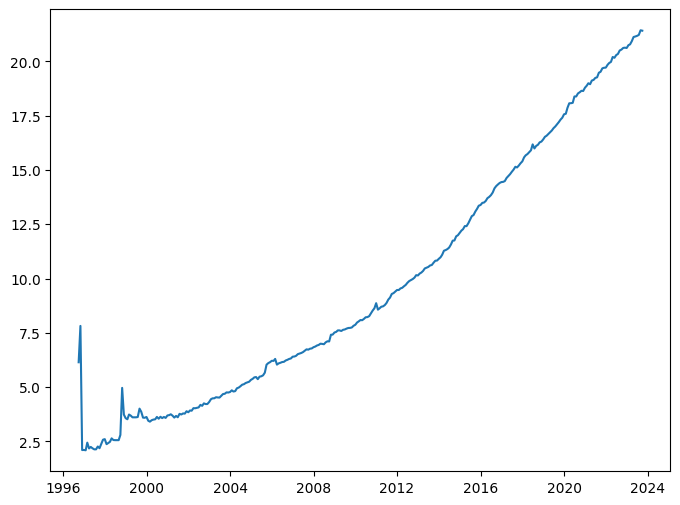

In [17]:
columns = pd.to_datetime(list(df.columns)) # Going back to the original dataframe and getting the columns from there
columns = list(columns) # Turning it from Pandas format to list format

print(len(columns), columns[:3])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(columns, list(year_sums)) # Plotting it!

In [18]:
company_website_year_sums = year_sums

In [19]:
company_website_year_sums_columns = columns

In [20]:
about_us_year_sums = year_sums

In [21]:
about_us_year_sums_columns = columns

In [22]:
about_us_year_sums

[21.413958560523447,
 21.432656625191008,
 21.218654434250766,
 21.174759405074365,
 21.146325459317584,
 21.122618786949857,
 20.932251699188775,
 20.78331503841932,
 20.748017621145376,
 20.61742006615215,
 20.631265179951424,
 20.61872095596371,
 20.542174009298208,
 20.502657218777678,
 20.34330673758865,
 20.28799644996672,
 20.165740946456342,
 20.202312138728324,
 19.977070347284062,
 19.92463768115942,
 19.845054699709756,
 19.713424167969624,
 19.706106016551107,
 19.679236812570146,
 19.520702070207022,
 19.477113866967304,
 19.26356238698011,
 19.239204160072347,
 19.14741847826087,
 19.11756695415343,
 18.948828746872866,
 18.992477775245042,
 18.87997256515775,
 18.788003663003664,
 18.63671785468714,
 18.645790318880476,
 18.577260147601475,
 18.524878500347143,
 18.38552815262913,
 18.384126236457842,
 18.092046259145622,
 18.07410037878788,
 18.069850320741267,
 17.86,
 17.588655862726405,
 17.56348448687351,
 17.40415373597517,
 17.31866028708134,
 17.202107279693486,


In [23]:
company_website_year_sums

[21.413958560523447,
 21.432656625191008,
 21.218654434250766,
 21.174759405074365,
 21.146325459317584,
 21.122618786949857,
 20.932251699188775,
 20.78331503841932,
 20.748017621145376,
 20.61742006615215,
 20.631265179951424,
 20.61872095596371,
 20.542174009298208,
 20.502657218777678,
 20.34330673758865,
 20.28799644996672,
 20.165740946456342,
 20.202312138728324,
 19.977070347284062,
 19.92463768115942,
 19.845054699709756,
 19.713424167969624,
 19.706106016551107,
 19.679236812570146,
 19.520702070207022,
 19.477113866967304,
 19.26356238698011,
 19.239204160072347,
 19.14741847826087,
 19.11756695415343,
 18.948828746872866,
 18.992477775245042,
 18.87997256515775,
 18.788003663003664,
 18.63671785468714,
 18.645790318880476,
 18.577260147601475,
 18.524878500347143,
 18.38552815262913,
 18.384126236457842,
 18.092046259145622,
 18.07410037878788,
 18.069850320741267,
 17.86,
 17.588655862726405,
 17.56348448687351,
 17.40415373597517,
 17.31866028708134,
 17.202107279693486,


In [24]:
# Create a DataFrame
df_final = pd.DataFrame({
    'year_month_day': about_us_year_sums_columns,
    'company_website_year_sums': company_website_year_sums,
    'about_us_year_sums': about_us_year_sums
})

# Add the combined column
df_final['combined'] = df_final['company_website_year_sums'] + df_final['about_us_year_sums']

print(df_final)

    year_month_day  company_website_year_sums  about_us_year_sums   combined
0       2023-10-01                  21.413959           21.413959  42.827917
1       2023-09-01                  21.432657           21.432657  42.865313
2       2023-08-01                  21.218654           21.218654  42.437309
3       2023-07-01                  21.174759           21.174759  42.349519
4       2023-06-01                  21.146325           21.146325  42.292651
..             ...                        ...                 ...        ...
320     1997-02-01                   2.089069            2.089069   4.178138
321     1997-01-01                   2.104167            2.104167   4.208333
322     1996-12-01                   2.099567            2.099567   4.199134
323     1996-11-01                   7.816667            7.816667  15.633333
324     1996-10-01                   6.142857            6.142857  12.285714

[325 rows x 4 columns]


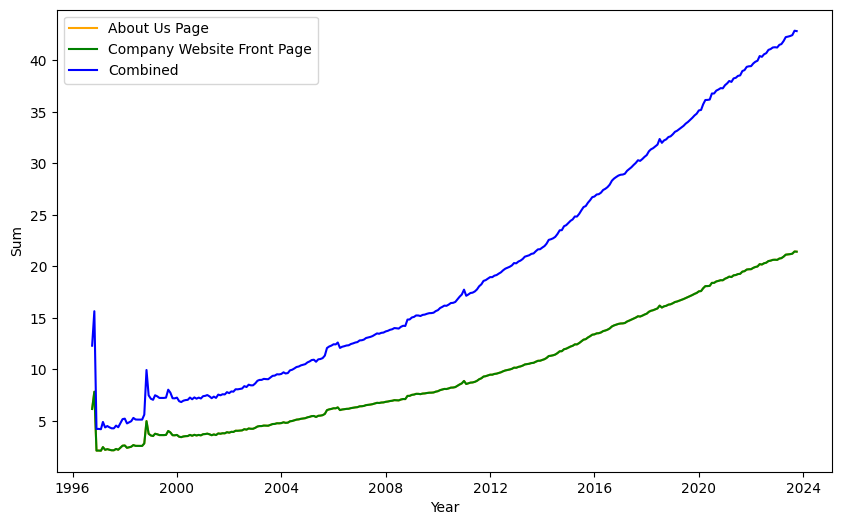

In [25]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each series
plt.plot(df_final['year_month_day'], df_final['about_us_year_sums'], label='About Us Page', color='orange')
plt.plot(df_final['year_month_day'], df_final['company_website_year_sums'], label='Company Website Front Page', color='green')
plt.plot(df_final['year_month_day'], df_final['combined'], label='Combined', color='blue')

# Set labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Sum')

# Add legend
plt.legend()

# Show plot
plt.show()

In [26]:
df_final.to_csv("C:\\Users\\theal\\research\\plot_recreation\\tf_idf_values.csv", index=False)